The purpose of this lab is to introduce some tricks and tools to handle networks.
We will try to keep it very practical with some assignments in between!

We will do the following:
    * Basic intro on networks (see slides)
    * Basics of NetworkX (NB there are many alternatives, see Resources below)
    * Getting a first feeling of a network
    * Centrality of nodes
    * Communities
    * Explore using Gephi: an interface for small network exploration
    * Exercises

Node Degree distribution:
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


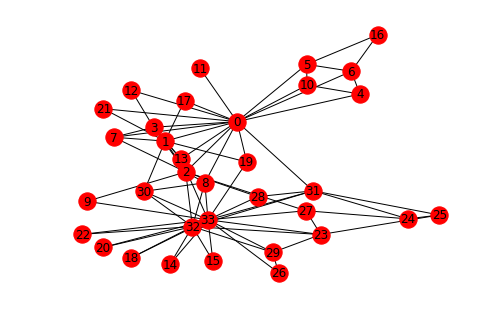

In [1]:
# Basic imports
import random
import numpy as np
from numpy.random import seed as random_seed
seed = 42 # reproducibility!
random.seed(seed)
random_seed(seed)
np.random.seed(seed)

# Test NetworkX

import matplotlib.pyplot as plt
import networkx as nx

# create a graph from a known network
G = nx.karate_club_graph()
# list the degree distibution
print("Node Degree distribution:")
for v in G:
    print('%s %s' % (v, G.degree(v)))
# plot it out
nx.draw_spring(G, with_labels=True)
plt.show()

In [2]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [3]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 17), (1, 2), (1, 3), (1, 21), (1, 19), (1, 7), (1, 13), (1, 30), (2, 3), (2, 32), (2, 7), (2, 8), (2, 9), (2, 27), (2, 28), (2, 13), (3, 7), (3, 12), (3, 13), (4, 10), (4, 6), (5, 16), (5, 10), (5, 6), (6, 16), (8, 32), (8, 30), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 32), (23, 25), (23, 27), (23, 29), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 33), (26, 29), (27, 33), (28, 33), (28, 31), (29, 32), (29, 33), (30, 33), (30, 32), (31, 32), (31, 33), (32, 33)])

### Basics of NetworkX
For more, see: https://networkx.github.io/documentation/stable/tutorial.html

In [4]:
G = nx.DiGraph() # create a directed graph instance
G.add_nodes_from([n for n in range(100)]) # add nodes

Let's add some edges. Note that an undirected network can, in theory, contain at best $\frac{N(N-1)}{2}$ edges. Double that for directed networks (assuming no self-loops).

Why?

Networks with that number of edges are called fully connected.

In [5]:
len(G.nodes)

100

In [6]:
# let's create some random edges with weights
n_edges = 500
edge_from = np.random.choice(len(G.nodes), n_edges, replace=True)
edge_to = np.random.choice(len(G.nodes), n_edges, replace=True)
weights = np.random.uniform(0,1,n_edges).astype(np.float16)
G.add_weighted_edges_from([(f,t,w) for f,t,w in zip(edge_from,edge_to,weights)]) # add vertices

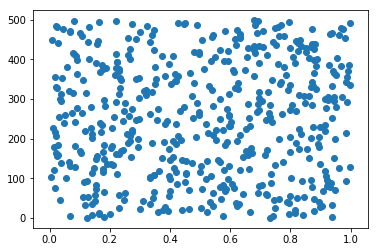

In [7]:
# Out weights
plt.scatter(weights,[n for n in range(n_edges)])
plt.show()

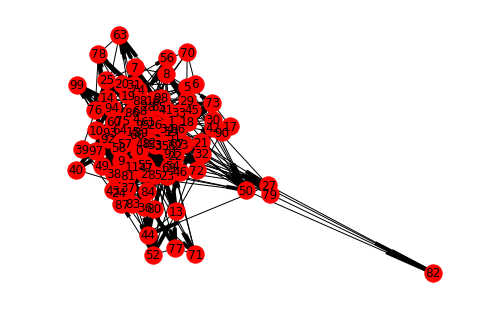

In [8]:
# plot it out
nx.draw_spring(G, with_labels=True)
plt.show()

### A first feeling of a newtork
Some general measures to get a first impression.

In [9]:
# basics
print("Number of nodes:",G.order())
print("Number of edges:",G.size()) # note some were replicated, thus overwritten
print("Avg. degree (not weighted):",G.size()/G.order())
# calculate yourself the Avg. weighted degree
# print("Diameter:",nx.diameter(G)) # gives an error, why?

Number of nodes: 100
Number of edges: 490
Avg. degree (not weighted): 4.9


In [10]:
# Connected components
# Strongly connected: if there is a directed path from all vertices v_1 and V_2 in the component, and vice versa
print(nx.number_strongly_connected_components(G))
# Weakly connected: as if undirected
print(nx.number_weakly_connected_components(G))

2
1


In [11]:
nx.is_strongly_connected(G)

False

In [12]:
nx.is_weakly_connected(G)

True

In [13]:
# The giant strongly connected component
largest = max(nx.strongly_connected_components(G), key=len)
print(len(largest))

99


#### Degree distribution

In [14]:
# degree distribution: very important to characterize different kinds of networks. 
# Many networks follow power laws in their degree distribution: this one does not, of course!
from collections import Counter
in_degrees = dict(G.in_degree())
in_hist = Counter(in_degrees.values())
out_degrees = dict(G.out_degree())
out_hist = Counter(out_degrees.values())

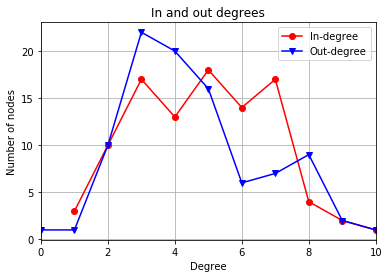

In [15]:
plt.figure()
plt.grid(True)
plt.plot(in_hist.keys(), in_hist.values(), 'ro-')
plt.plot(out_hist.keys(), out_hist.values(), 'bv-') 
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('In and out degrees')
plt.xlim([0, 10])
plt.show()

In [16]:
# Try with the weighted degree

#### Clustering coefficient

In [17]:
# Clustering coefficients, only for undirected networks
# Intuition: number of closed triplets / number of connected triplets
# Can be calculated locally for a node, or globally for the whole network. Intuition: maps reciprocity in cliques.
G_un = G.to_undirected()
print("Avg. global clustering:",nx.average_clustering(G_un))
print("Individual clustering:",nx.clustering(G_un,0))

Avg. global clustering: 0.10367685745626916
Individual clustering: 0.08333333333333333


### Node centralities
The importance of individual nodes.

In [18]:
# Degree is a centrality!

In [19]:
# Another example: Betweenness. Intuition: how many shortest paths go through a node/edge?
# https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality
btw = nx.betweenness_centrality(G,weight='weight',normalized=True)
# add it as an attribute to the nodes
for n,b in zip(G.nodes,btw.values()):
    G.nodes[n]["btw"] = b

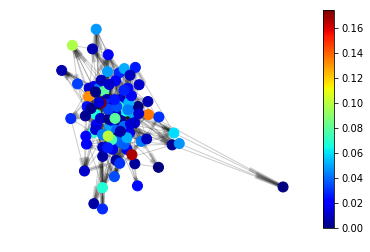

In [20]:
# plot it out
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=[G.nodes[n]["btw"] for n in G.nodes], 
                            with_labels=False, node_size=100, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.axis('off')
plt.show()

In [21]:
# See for more: https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html

#### Page Rank
See these notes: http://users.dimi.uniud.it/~massimo.franceschet/teaching/datascience/network/pagerank.html

Implement Page Rank yourself, either via direct computation (needs to be a small graph) or with the iterative power method.

Numpy linear algebra: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html

In [22]:
# functions which might be useful
A = nx.adjacency_matrix(G)

In [23]:
A.shape

(100, 100)

In [24]:
# compare with:
pgr = nx.pagerank(G)

### Community detection
Finding groups of nodes which belong together.

In [25]:
# Let's get a real network
lesmis = nx.read_gml("data/lesmiserables.gml")

#### Using centrality measures

In [26]:
# Using centrality measures
gn = nx.community.centrality.girvan_newman(lesmis)

In [27]:
partition = [c for c in next(gn)]

In [28]:
clustering = dict()
for n,c in enumerate(partition):
    for node in c:
        clustering[node] = n

In [29]:
# add it as an attribute to the nodes
for n in lesmis.nodes:
    lesmis.nodes[n]["girvan"] = clustering[n]

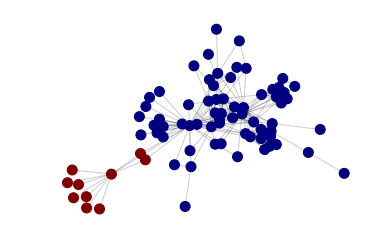

In [30]:
# plot it out
pos = nx.spring_layout(lesmis)
ec = nx.draw_networkx_edges(lesmis, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(lesmis, pos, nodelist=lesmis.nodes(), node_color=[lesmis.nodes[n]["girvan"] for n in lesmis.nodes], 
                            with_labels=False, node_size=100, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

#### Modularity maximization
Idea: compare with a null model where edges are allocated at random.

See: http://users.dimi.uniud.it/~massimo.franceschet/teaching/datascience/network/modularity-community.html

In [31]:
from community import community_louvain

In [32]:
partition = community_louvain.best_partition(lesmis)
# add it as an attribute to the nodes
for n in lesmis.nodes:
    lesmis.nodes[n]["louvain"] = partition[n]

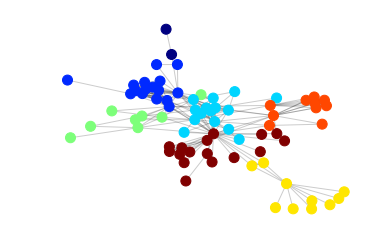

In [33]:
# plot it out
pos = nx.spring_layout(lesmis)
ec = nx.draw_networkx_edges(lesmis, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(lesmis, pos, nodelist=lesmis.nodes(), node_color=[lesmis.nodes[n]["louvain"] for n in lesmis.nodes], 
                            with_labels=False, node_size=100, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

### Gephi
Gephi is an interface which you can use to rapidly analyse smallish graphs.

Try to replicate what we saw here on a provided network, using it.

### Exercises

Your are given some networks in the data folder. 

3 different social networks:
    * The co-occurrence of characters in the novel Les Miserables
    * The social network of a karate club (interactions outside the club)
    * Co-citation of network scientists
1 technological network:
    * Power grid
1 language network:
    * Word adjacency 
    
What to do (you can also use Gephi if you prefer):
    * Load them and explore their basics
    * Look at degree distributions
    * Explore the centrality properties of these networks
    * Explore structural properties
    * Explore communities with your method of choice
    * Write a small report highlighting the main differences you can infer according to the typology of the network

### Resources
SNAP page of resources: http://web.stanford.edu/class/cs224w/resources.html

Alternative to NetworkX, see igraph: http://igraph.org/python/

Community detection, see Python Louvain: https://github.com/vtraag/louvain-igraph

For larger graph analysis: 
    * Graph tool: https://graph-tool.skewed.de
    * Network kit: https://networkit.iti.kit.edu/api/structures.html
    * SNAP: http://snap.stanford.edu/snap/
    * Pajek: http://mrvar.fdv.uni-lj.si/pajek/
    * Network Workbench: http://nwb.cns.iu.edu
    * Apache Giraph: http://giraph.apache.org